In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Read Data

In [2]:
url='https://raw.githubusercontent.com/jarif87/DataSets/main/uci_breast_cancer.csv'
df=pd.read_csv(url)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.shape

(569, 33)

In [7]:
df.drop(["id","Unnamed: 32"],axis=1,inplace=True)


In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Correlation Matrix

/tmp/ipykernel_143/381035862.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


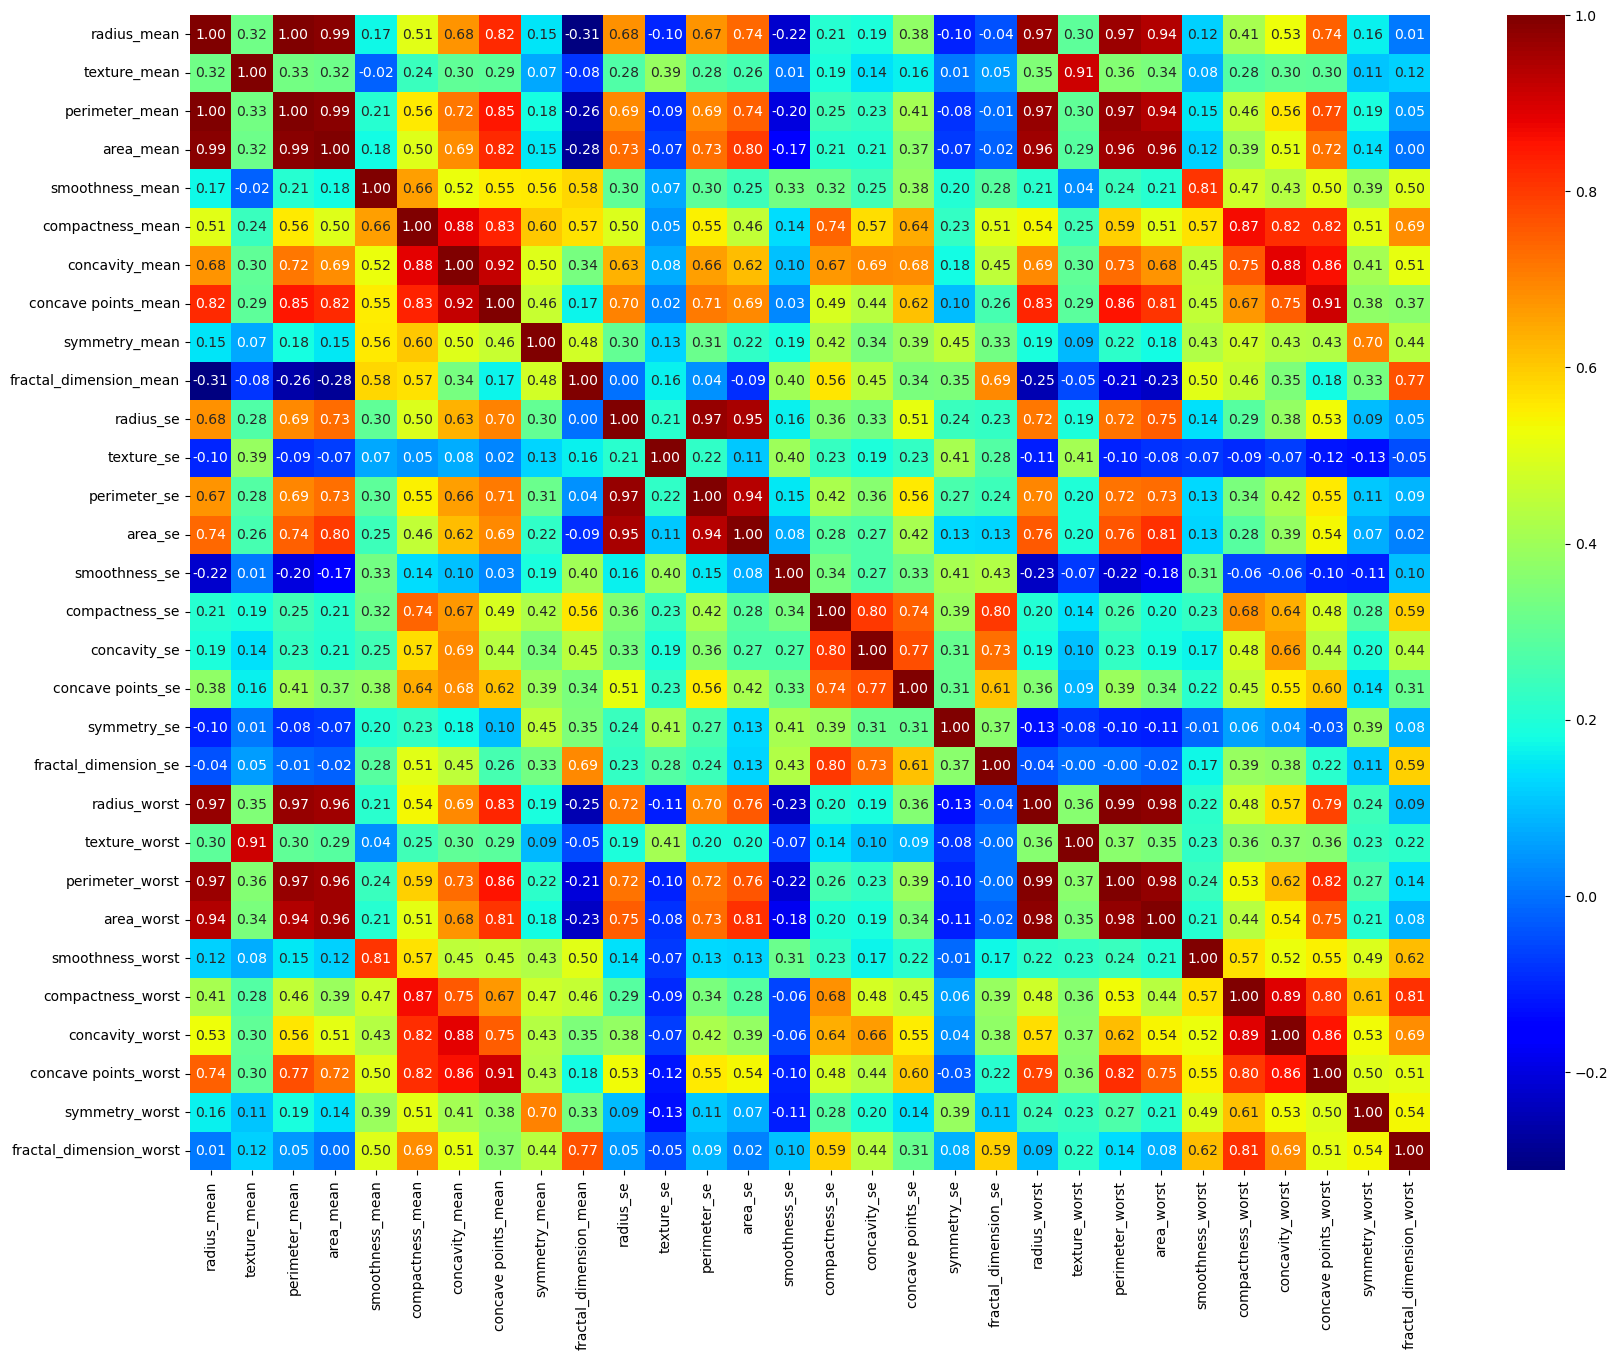

In [9]:
cor=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor,annot=True,fmt=".2f",cmap="jet")
plt.show()

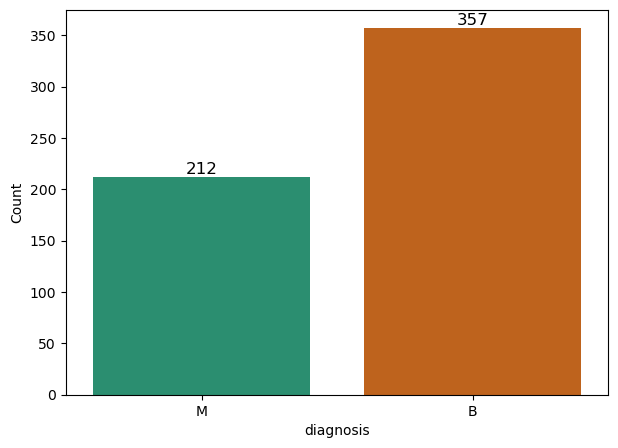

In [10]:

plt.figure(figsize=(7, 5))
ax = sns.countplot(x='diagnosis', data=df, palette="Dark2")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12)

plt.ylabel('Count')

plt.show()

#### **M==1**

#### **B==0**

In [11]:
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
X=df.drop("diagnosis",axis=1)
Y=df["diagnosis"]

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

# XGB Classifier and Evaluation

In [14]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [15]:
pred=xgb_classifier.predict(X_test)
pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

# Evaluate XGB Classifier Model Performance

Accuracy Score : 0.9824561403508771
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



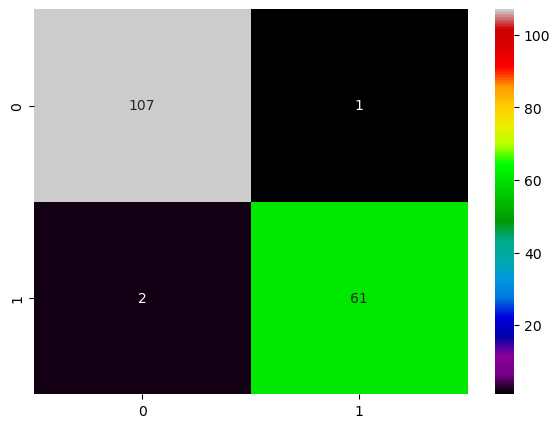

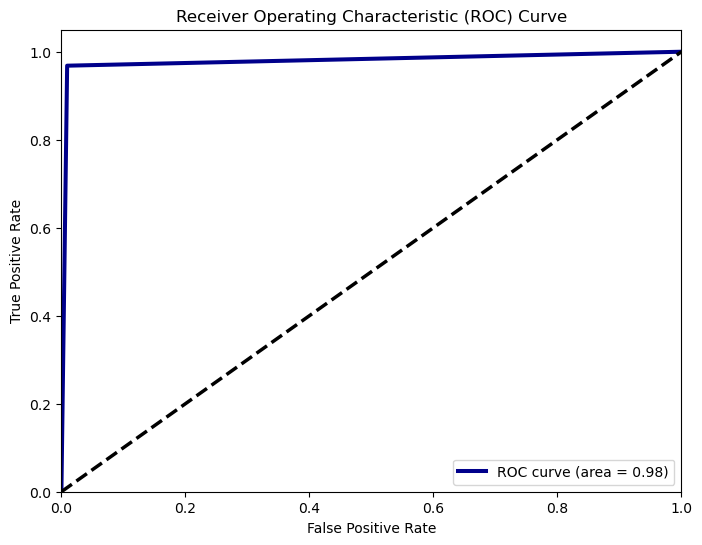

In [16]:
acc=accuracy_score(Y_test,pred)
print("Accuracy Score :",acc)
print("======================================================")
print("======================================================")
print(classification_report(Y_test,pred))
print("========================================================================")
print("========================================================================")
cf_matrix=confusion_matrix(Y_test,pred)
plt.figure(figsize=(7,5))
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="nipy_spectral")
plt.show()

print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")


fpr, tpr, thresholds = roc_curve(Y_test,pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkblue', lw=2.9,label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--',lw=2.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# AdaBoostClassifier

In [17]:

ada=AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [18]:
pred0=ada.predict(X_test)
pred0

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

# Evaluate AdaBoost Classifier Model Performance

Accuracy Score : 0.9824561403508771
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



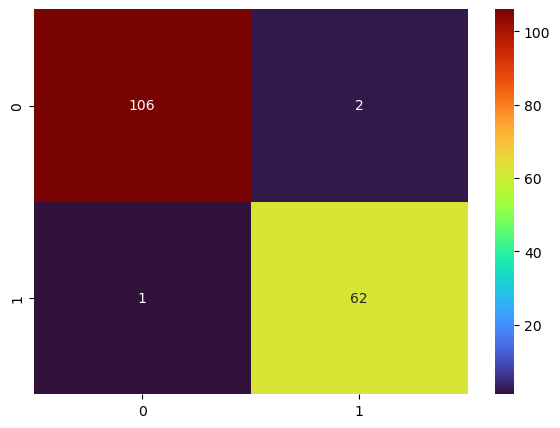

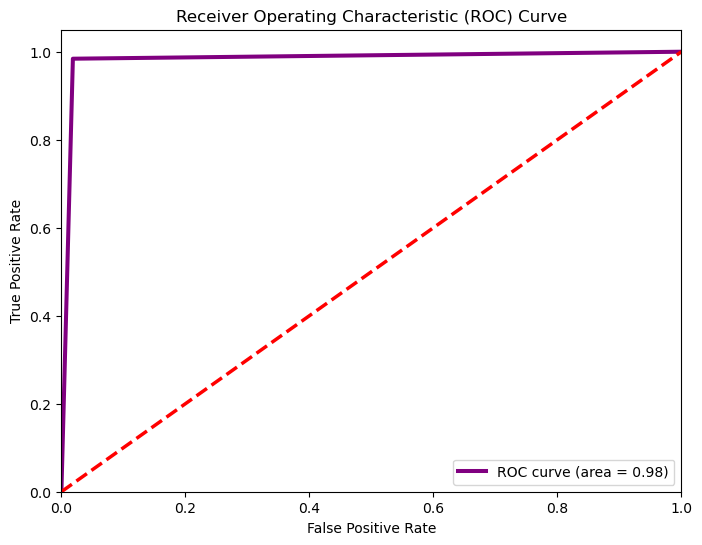

In [19]:
acc=accuracy_score(Y_test,pred0)
print("Accuracy Score :",acc)
print("======================================================")
print("======================================================")
print(classification_report(Y_test,pred0))
print("========================================================================")
print("========================================================================")
cf_matrix=confusion_matrix(Y_test,pred0)
plt.figure(figsize=(7,5))
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="turbo")
plt.show()

print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")


fpr, tpr, thresholds = roc_curve(Y_test,pred0)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2.9,label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--',lw=2.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Initialize Hyperparameters

In [20]:
ada_parameter={'n_estimators': [50, 100, 200,300],
                'learning_rate': [0.01, 0.1, 0.3,0.5],
                'algorithm': ['SAMME', 'SAMME.R'],
                'random_state': [42]}


xgb_parameter = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.3, 0.5],
    'n_estimators': [50, 100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]}


# AdaBoost Grid Search

In [21]:
ada_grid_search = GridSearchCV(ada, param_grid=ada_parameter, cv=5, n_jobs=-1)
ada_grid_search.fit(X_train,Y_train)
ada_pred=ada_grid_search.predict(X_test)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [22]:
# ada_grid_search.cv_results_
tuning_result_ada = pd.DataFrame(ada_grid_search.cv_results_)
tuning_result_ada.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_learning_rate,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.213137,0.002779,0.012184,0.000265,SAMME,0.01,50,42,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.9500,0.9125,0.9125,0.936709,0.924051,0.927152,0.014508,32
1,0.412588,0.004166,0.020652,0.000434,SAMME,0.01,100,42,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.9500,0.9250,0.9125,0.936709,0.962025,0.937247,0.017546,30
2,1.172537,0.187428,0.044881,0.013778,SAMME,0.01,200,42,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.9500,0.9500,0.9375,0.949367,0.949367,0.947247,0.004882,27
3,1.234133,0.010843,0.055211,0.002117,SAMME,0.01,300,42,"{'algorithm': 'SAMME', 'learning_rate': 0.01, ...",0.9625,0.9375,0.9500,0.949367,0.949367,0.949747,0.007912,26
4,0.209326,0.008921,0.012036,0.000674,SAMME,0.1,50,42,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",0.9625,0.9250,0.9625,0.962025,0.962025,0.954810,0.014907,22
5,0.439408,0.028822,0.026222,0.009290,SAMME,0.1,100,42,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",0.9625,0.9375,0.9625,0.974684,0.962025,0.959842,0.012152,10
6,0.849442,0.014694,0.039480,0.001748,SAMME,0.1,200,42,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",0.9750,0.9500,0.9625,0.974684,0.949367,0.962310,0.011254,6
7,1.243911,0.014176,0.057730,0.002143,SAMME,0.1,300,42,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",0.9750,0.9375,0.9625,0.974684,0.949367,0.959810,0.014601,11
8,0.213060,0.003180,0.012496,0.000582,SAMME,0.3,50,42,"{'algorithm': 'SAMME', 'learning_rate': 0.3, '...",0.9750,0.9625,0.9625,0.974684,0.949367,0.964810,0.009492,2
9,0.426069,0.007398,0.021252,0.000700,SAMME,0.3,100,42,"{'algorithm': 'SAMME', 'learning_rate': 0.3, '...",0.9750,0.9500,0.9625,0.974684,0.949367,0.962310,0.011254,6


In [23]:
ada_grid_search.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 0.3,
 'n_estimators': 200,
 'random_state': 42}

In [24]:
ada_grid_search.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.3, n_estimators=200,
                   random_state=42)

# Evaluate The Optimized AdaBoost Classifier (Grid Search)

Accuracy Score : 0.9707602339181286
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



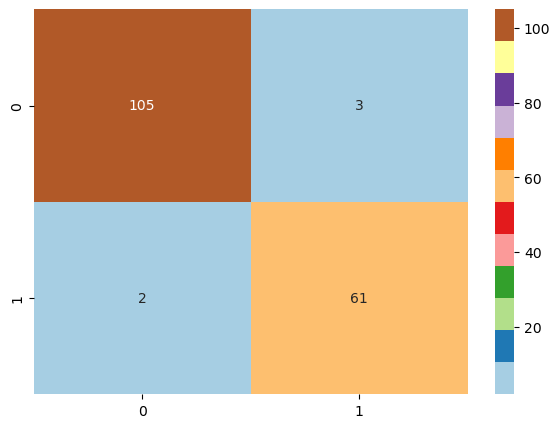

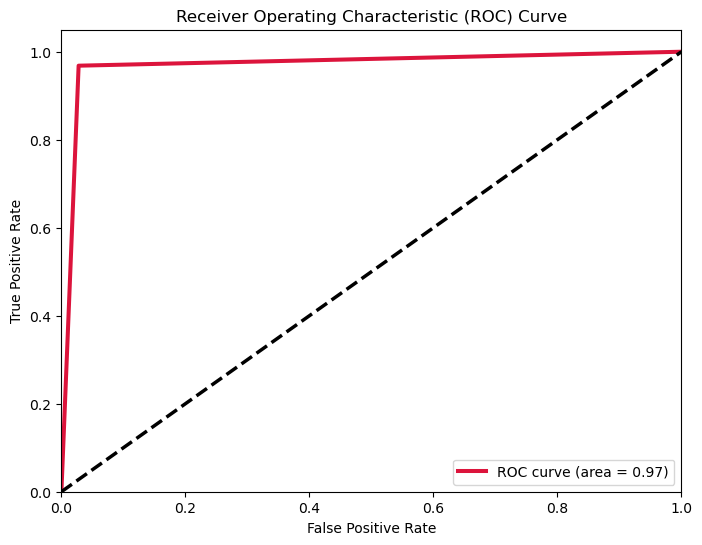

In [25]:
acc=accuracy_score(Y_test,ada_pred)
print("Accuracy Score :",acc)
print("======================================================")
print("======================================================")
print(classification_report(Y_test,ada_pred))
print("========================================================================")
print("========================================================================")
cf_matrix=confusion_matrix(Y_test,ada_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="Paired")
plt.show()

print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")


fpr, tpr, thresholds = roc_curve(Y_test,ada_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='crimson', lw=2.9,label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--',lw=2.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# AdaBoost Random Search

In [26]:
ada_random_search = RandomizedSearchCV(ada, param_distributions=ada_parameter, n_iter=100, cv=5,n_jobs=-1)
ada_random_search.fit(X_train,Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(n_estimators=100,
                                                random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.01, 0.1, 0.3, 0.5],
                                        'n_estimators': [50, 100, 200, 300],
                                        'random_state': [42]})

In [27]:
tuning_result_ada0 = pd.DataFrame(ada_random_search.cv_results_)
tuning_result_ada0.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_state,param_n_estimators,param_learning_rate,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.209143,0.004349,0.012945,0.001586,42,50,0.01,SAMME,"{'random_state': 42, 'n_estimators': 50, 'lear...",0.9500,0.9125,0.9125,0.936709,0.924051,0.927152,0.014508,32
1,0.412122,0.002913,0.020577,0.000964,42,100,0.01,SAMME,"{'random_state': 42, 'n_estimators': 100, 'lea...",0.9500,0.9250,0.9125,0.936709,0.962025,0.937247,0.017546,30
2,1.025402,0.281323,0.043240,0.011159,42,200,0.01,SAMME,"{'random_state': 42, 'n_estimators': 200, 'lea...",0.9500,0.9500,0.9375,0.949367,0.949367,0.947247,0.004882,27
3,1.341327,0.162998,0.058781,0.004065,42,300,0.01,SAMME,"{'random_state': 42, 'n_estimators': 300, 'lea...",0.9625,0.9375,0.9500,0.949367,0.949367,0.949747,0.007912,26
4,0.210943,0.004869,0.012180,0.000436,42,50,0.1,SAMME,"{'random_state': 42, 'n_estimators': 50, 'lear...",0.9625,0.9250,0.9625,0.962025,0.962025,0.954810,0.014907,22
5,0.414173,0.006251,0.020806,0.000926,42,100,0.1,SAMME,"{'random_state': 42, 'n_estimators': 100, 'lea...",0.9625,0.9375,0.9625,0.974684,0.962025,0.959842,0.012152,10
6,0.823909,0.006619,0.039439,0.002072,42,200,0.1,SAMME,"{'random_state': 42, 'n_estimators': 200, 'lea...",0.9750,0.9500,0.9625,0.974684,0.949367,0.962310,0.011254,6
7,1.233538,0.015282,0.057000,0.004285,42,300,0.1,SAMME,"{'random_state': 42, 'n_estimators': 300, 'lea...",0.9750,0.9375,0.9625,0.974684,0.949367,0.959810,0.014601,11
8,0.207179,0.004029,0.011765,0.000273,42,50,0.3,SAMME,"{'random_state': 42, 'n_estimators': 50, 'lear...",0.9750,0.9625,0.9625,0.974684,0.949367,0.964810,0.009492,2
9,0.447329,0.027610,0.021280,0.000359,42,100,0.3,SAMME,"{'random_state': 42, 'n_estimators': 100, 'lea...",0.9750,0.9500,0.9625,0.974684,0.949367,0.962310,0.011254,6


In [28]:
ada_best_para = ada_random_search.best_params_
ada_estimator= ada_random_search.best_estimator_
print("AdaBoost Best Parameter :",ada_best_para)
print("\n")
print("AdaBoost Estimator :",ada_estimator)

AdaBoost Best Parameter : {'random_state': 42, 'n_estimators': 200, 'learning_rate': 0.3, 'algorithm': 'SAMME'}


AdaBoost Estimator : AdaBoostClassifier(algorithm='SAMME', learning_rate=0.3, n_estimators=200,
                   random_state=42)


#  Evaluate The Optimized AdaBoost Classifier (Random Search)

Accuracy Score : 0.9707602339181286
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



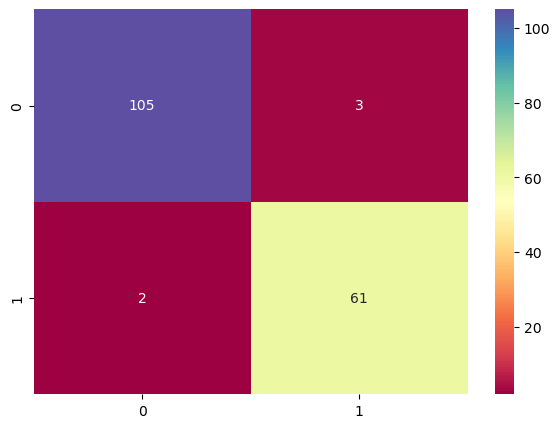

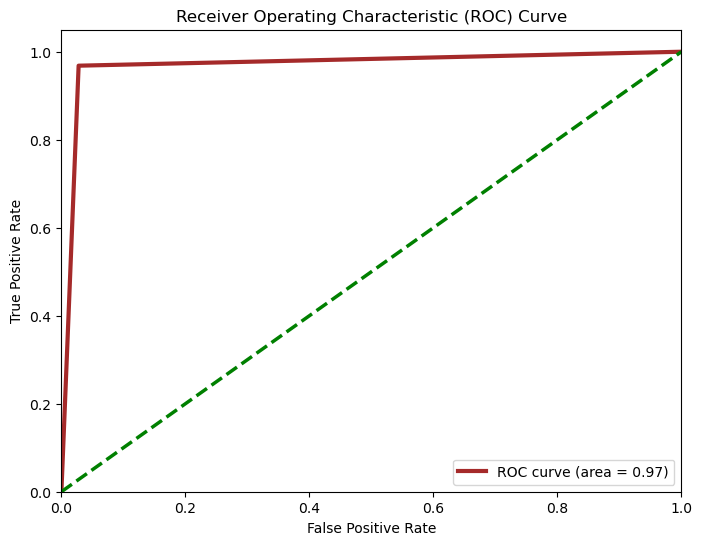

In [29]:
ada_random_pred=ada_random_search.predict(X_test)
acc=accuracy_score(Y_test,ada_random_pred)
print("Accuracy Score :",acc)
print("======================================================")
print("======================================================")
print(classification_report(Y_test,ada_random_pred))
print("========================================================================")
print("========================================================================")
cf_matrix=confusion_matrix(Y_test,ada_random_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="Spectral")
plt.show()

print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")


fpr, tpr, thresholds = roc_curve(Y_test,ada_random_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='brown', lw=3,label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='green', linestyle='--',lw=2.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# XGB Grid Search

In [30]:
xgb_grid= GridSearchCV(xgb_classifier, param_grid=xgb_parameter, cv=5,n_jobs=-1)
xgb_grid.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 1, 5],
                         'learning_rate': [0.01, 0.1, 0.3, 0.5],
                         'max_depth': [3, 5, 7, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]})

In [31]:
xgb_best_para =xgb_grid.best_params_
xgb_estimator= xgb_grid.best_estimator_
print("AdaBoost Best Parameter :",xgb_best_para)
print("\n")
print("AdaBoost Estimator :",xgb_estimator)

AdaBoost Best Parameter : {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}


AdaBoost Estimator : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [32]:
tuning_result_xgb0 = pd.DataFrame(xgb_grid.cv_results_)
tuning_result_xgb0.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.086339,0.013923,0.004504,0.000150,0.6,0,0.01,3,1,50,0.8,"{'colsample_bytree': 0.6, 'gamma': 0, 'learnin...",0.9625,0.9125,0.9500,0.936709,0.949367,0.942215,0.016950,4100
1,0.077989,0.000746,0.004275,0.000243,0.6,0,0.01,3,1,50,0.9,"{'colsample_bytree': 0.6, 'gamma': 0, 'learnin...",0.9625,0.9000,0.9250,0.936709,0.936709,0.932184,0.020236,4945
2,0.080838,0.002663,0.004291,0.000165,0.6,0,0.01,3,1,50,1.0,"{'colsample_bytree': 0.6, 'gamma': 0, 'learnin...",0.9625,0.9000,0.9250,0.936709,0.949367,0.934715,0.021402,4701
3,0.139036,0.001385,0.004257,0.000160,0.6,0,0.01,3,1,100,0.8,"{'colsample_bytree': 0.6, 'gamma': 0, 'learnin...",0.9500,0.9250,0.9500,0.936709,0.949367,0.942215,0.009990,4100
4,0.146457,0.001671,0.004364,0.000126,0.6,0,0.01,3,1,100,0.9,"{'colsample_bytree': 0.6, 'gamma': 0, 'learnin...",0.9500,0.9125,0.9500,0.936709,0.936709,0.937184,0.013699,4619
5,0.153512,0.002666,0.004494,0.000257,0.6,0,0.01,3,1,100,1.0,"{'colsample_bytree': 0.6, 'gamma': 0, 'learnin...",0.9500,0.9000,0.9250,0.936709,0.949367,0.932215,0.018550,4906
6,0.271103,0.003180,0.004973,0.000609,0.6,0,0.01,3,1,200,0.8,"{'colsample_bytree': 0.6, 'gamma': 0, 'learnin...",0.9500,0.9375,0.9500,0.936709,0.949367,0.944715,0.006223,3970
7,0.285383,0.005299,0.004733,0.000232,0.6,0,0.01,3,1,200,0.9,"{'colsample_bytree': 0.6, 'gamma': 0, 'learnin...",0.9500,0.9125,0.9625,0.936709,0.949367,0.942215,0.016950,4195
8,0.319508,0.028153,0.004755,0.000105,0.6,0,0.01,3,1,200,1.0,"{'colsample_bytree': 0.6, 'gamma': 0, 'learnin...",0.9500,0.9000,0.9625,0.936709,0.949367,0.939715,0.021468,4309
9,0.641958,0.133211,0.010758,0.005015,0.6,0,0.01,3,1,300,0.8,"{'colsample_bytree': 0.6, 'gamma': 0, 'learnin...",0.9500,0.9375,0.9625,0.962025,0.962025,0.954810,0.009859,2852


# Evaluate The Optimized XGB Classifier (Grid Search)

Accuracy Score : 0.9707602339181286
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



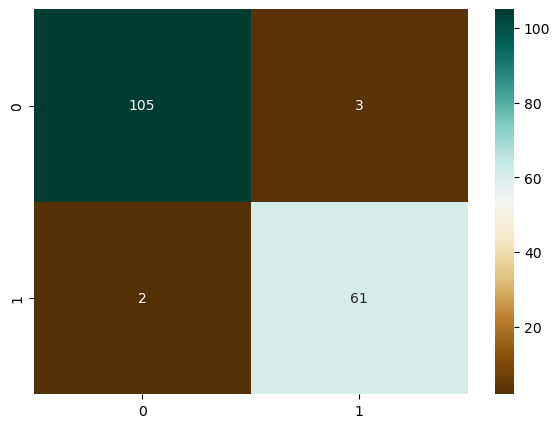

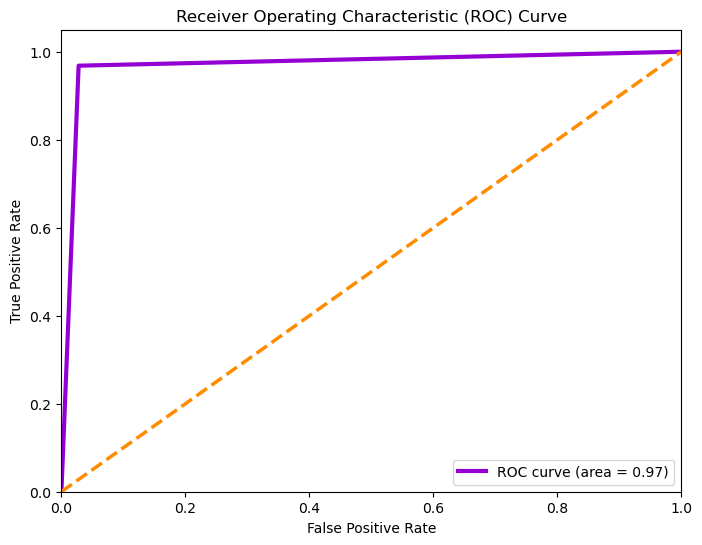

In [33]:
xgb_grid_pred=xgb_grid.predict(X_test)
acc=accuracy_score(Y_test,xgb_grid_pred)
print("Accuracy Score :",acc)
print("======================================================")
print("======================================================")
print(classification_report(Y_test,xgb_grid_pred))
print("========================================================================")
print("========================================================================")
cf_matrix=confusion_matrix(Y_test,xgb_grid_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="BrBG")
plt.show()

print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")


fpr, tpr, thresholds = roc_curve(Y_test,xgb_grid_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkviolet', lw=3,label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='darkorange', linestyle='--',lw=2.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# XGB Random Search

In [34]:
xgb_random= RandomizedSearchCV(xgb_classifier, param_distributions=xgb_parameter, n_iter=100, cv=5,n_jobs=-1)
xgb_random.fit(X_train,Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 0.3, 0.5],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]})

In [35]:
xgb_best_para0 =xgb_random.best_params_
xgb_estimator0= xgb_random.best_estimator_
print("AdaBoost Best Parameter :",xgb_best_para0)
print("\n")
print("AdaBoost Estimator :",xgb_estimator0)

AdaBoost Best Parameter : {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.5, 'gamma': 0, 'colsample_bytree': 1.0}


AdaBoost Estimator : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [36]:
tuning_result_xgb1 = pd.DataFrame(xgb_random.cv_results_)
tuning_result_xgb1.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.044888,0.002644,0.005461,0.002139,0.9,50,5,7,0.5,0,1.0,"{'subsample': 0.9, 'n_estimators': 50, 'min_ch...",0.9750,0.9500,0.9875,0.974684,0.962025,0.969842,0.012780,5
1,0.199951,0.007564,0.004483,0.000277,1.0,300,1,10,0.5,0,0.8,"{'subsample': 1.0, 'n_estimators': 300, 'min_c...",1.0000,0.9625,0.9625,0.974684,0.949367,0.969810,0.017088,8
2,0.286113,0.009134,0.004523,0.000086,0.9,300,3,10,0.3,5,0.6,"{'subsample': 0.9, 'n_estimators': 300, 'min_c...",0.9875,0.9375,0.9625,0.974684,0.936709,0.959778,0.020133,43
3,0.052696,0.002820,0.004119,0.000115,0.9,50,5,10,0.5,5,1.0,"{'subsample': 0.9, 'n_estimators': 50, 'min_ch...",0.9500,0.9250,0.9250,0.962025,0.962025,0.944810,0.016760,78
4,0.159271,0.002508,0.004269,0.000223,0.8,100,5,3,0.01,1,1.0,"{'subsample': 0.8, 'n_estimators': 100, 'min_c...",0.9625,0.9000,0.9375,0.924051,0.949367,0.934684,0.021510,94
5,0.102278,0.002498,0.004131,0.000135,1.0,50,3,3,0.01,5,1.0,"{'subsample': 1.0, 'n_estimators': 50, 'min_ch...",0.9625,0.8750,0.9375,0.936709,0.949367,0.932215,0.030110,99
6,0.077182,0.002871,0.004036,0.000075,1.0,50,1,5,0.3,0,1.0,"{'subsample': 1.0, 'n_estimators': 50, 'min_ch...",0.9750,0.9500,0.9625,0.974684,0.949367,0.962310,0.011254,26
7,0.200900,0.008057,0.004067,0.000133,0.9,100,1,7,0.1,5,0.8,"{'subsample': 0.9, 'n_estimators': 100, 'min_c...",0.9625,0.9125,0.9500,0.949367,0.949367,0.944747,0.016884,80
8,0.057019,0.003415,0.004764,0.001315,0.9,50,1,7,0.5,0,0.8,"{'subsample': 0.9, 'n_estimators': 50, 'min_ch...",0.9750,0.9500,0.9750,0.974684,0.949367,0.964810,0.012353,18
9,0.043767,0.002028,0.004457,0.000690,0.9,50,3,7,0.5,0,0.6,"{'subsample': 0.9, 'n_estimators': 50, 'min_ch...",0.9625,0.9375,0.9750,0.974684,0.936709,0.957278,0.017080,53


# Evaluate The Optimized XGB Classifier (Random Search)

Accuracy Score : 0.9707602339181286
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



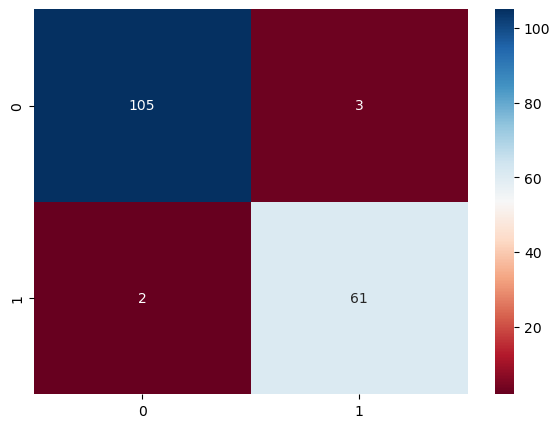

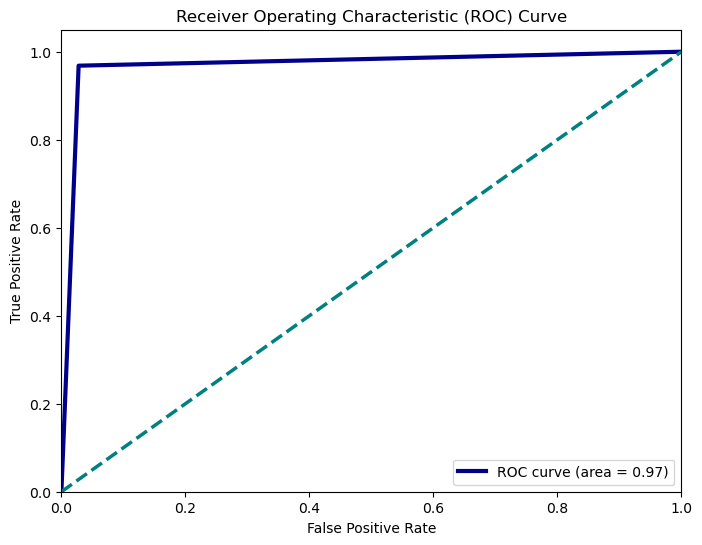

In [37]:
xgb_random_pred=xgb_random.predict(X_test)
acc=accuracy_score(Y_test,xgb_random_pred)
print("Accuracy Score :",acc)
print("======================================================")
print("======================================================")
print(classification_report(Y_test,xgb_random_pred))
print("========================================================================")
print("========================================================================")
cf_matrix=confusion_matrix(Y_test,xgb_random_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="RdBu")
plt.show()

print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")


fpr, tpr, thresholds = roc_curve(Y_test,xgb_random_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkblue', lw=3,label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='teal', linestyle='--',lw=2.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<div style="text-align: center;">
  <img src="https://www.icegif.com/wp-content/uploads/2022/10/icegif-899.gif" alt="GIF" />
</div>
